In [11]:
import pandas as pd
import argparse
import os
from collections import OrderedDict
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [12]:
IMAGE_DIR = '/home/LUNG_DATA/Image_1/'
MASK_DIR = '/home/LUNG_DATA/Mask_1/'
#CLEAN_DIR_IMG ='/home/LUNG_DATA/Clean_1/Image/'

# Directory to save data
train_output_img_dir = '/home/LUNG_DATA/Efficient_net/train/'
test_output_img_dir = '/home/LUNG_DATA/Efficient_net/test/'

#Meta Information
meta = pd.read_csv('/home/LUNG_DATA/meta_csv/meta.csv')
#clean_meta = pd.read_csv('clean_meta.csv')


# Get train/test label from meta.csv
meta['original_image']= meta['original_image'].apply(lambda x:IMAGE_DIR + x +'.npy')
meta['mask_image'] = meta['mask_image'].apply(lambda x:MASK_DIR + x +'.npy')

train_meta = meta[(meta['Segmentation_train']==True) & (meta['is_cancer']!='Ambiguous')]
test_meta = meta[(meta['Segmentation_train']==False) & (meta['is_cancer']!='Ambiguous')]
train_image_paths = list(train_meta['original_image'])
train_mask_paths = list(train_meta['mask_image'])
train_label = list(train_meta['is_cancer'].apply(lambda x: 1 if x=='True' else 0))

test_image_paths = list(test_meta['original_image'])
test_mask_paths = list(test_meta['mask_image'])
test_label = list(test_meta['is_cancer'].apply(lambda x: 1 if x=='True' else 0))

# Get clean images from clean_meta.csv
#lean_meta = clean_meta['original_image'].apply(lambda x:CLEAN_DIR_IMG+x)
#train_clean = clean_meta


In [24]:
test = np.load(train_output_img_dir+'0031_NI000_slice001.npy')

In [25]:
test.shape

(3, 224, 224)

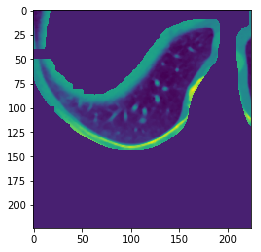

In [26]:
plt.imshow(test[0,:,:])

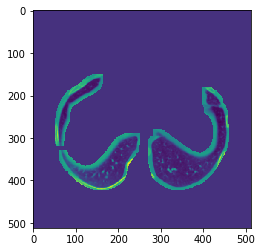

In [27]:
act = np.load(IMAGE_DIR+'/LIDC-IDRI-0031/0031_NI000_slice001.npy')
plt.imshow(act)

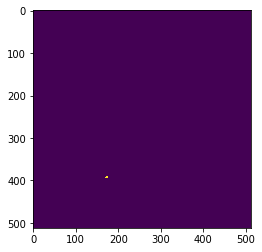

In [28]:
act_1 = np.load(MASK_DIR+'/LIDC-IDRI-0031/0031_MA000_slice001.npy')
plt.imshow(act_1)